# Plotting Notebook for CdTe Analysis

## Step 1: Loading in the FITS file, which will only be done one time

In [2]:
#we only want to load these in once, since they are large.
from astropy.io import fits

fits_file = "updated2026plotting/UMNCoolingTests/July102025/CdTe1Am241Fe55/CdTe1/slim_foxsi_cdte1_run348_PATH2.fits.gz"

cdte_data = fits.open(fits_file)[1].data

## Step 2: Define dictionaries that describe the run of interest

In [5]:
from utils import lab_plotting as lp

SUMMARY_DICT = {
    "SaveName": 'updated2026plotting/UMNCoolingTests/July102025/CdTe1Am241Fe55/CdTe1',
    "CdTe": 'CdTe1',
    "RunNumber": 348,
    "Date": 'July 10, 2025',
    "Voltage": '200V',
    "Temperature": '-20ºC',
    "Source": "Am241 and Fe55",
    "Location": 'UMN Cooler Test',
    "ReadoutMode": lp.find_readout_mode(cdte_data),
    "PathType": 2,
}


In [6]:
PATH1_plotconfigs = {
    "FilterPseudo": True,
    "KeepSingleClump": False,
    "PedestalTopRange": 1000,
    "LivetimeTopRange": 0.015,
    "CommonModeRange": [0, 300]
}

In [8]:
PATH2_plotconfigs = {
    "FilterPseudo": True,
    "KeepSingleClump": False,
    "SpectralEnergyRange": [4, 70],
    "LivetimeTopRange": 0.015
}

In [9]:
GAIN_plotconfigs = {
    "FilterPseudo": True,
    "KeepSingleClump": False
}

In [10]:
CHARGE_plotconfigs = {
    "FilterPseudo": True,
    "EnergyRange": [4, 70]
}

In [11]:
# this will be changed depending on if I am doing just path1 or all paths
full_dict = {
    "Summary": SUMMARY_DICT,
    "PATH1": PATH1_plotconfigs, 
    "PATH2": PATH2_plotconfigs,
    "Gain Shifting": GAIN_plotconfigs,
    "Charge Sharing": CHARGE_plotconfigs
}

## Step 3: Run everything

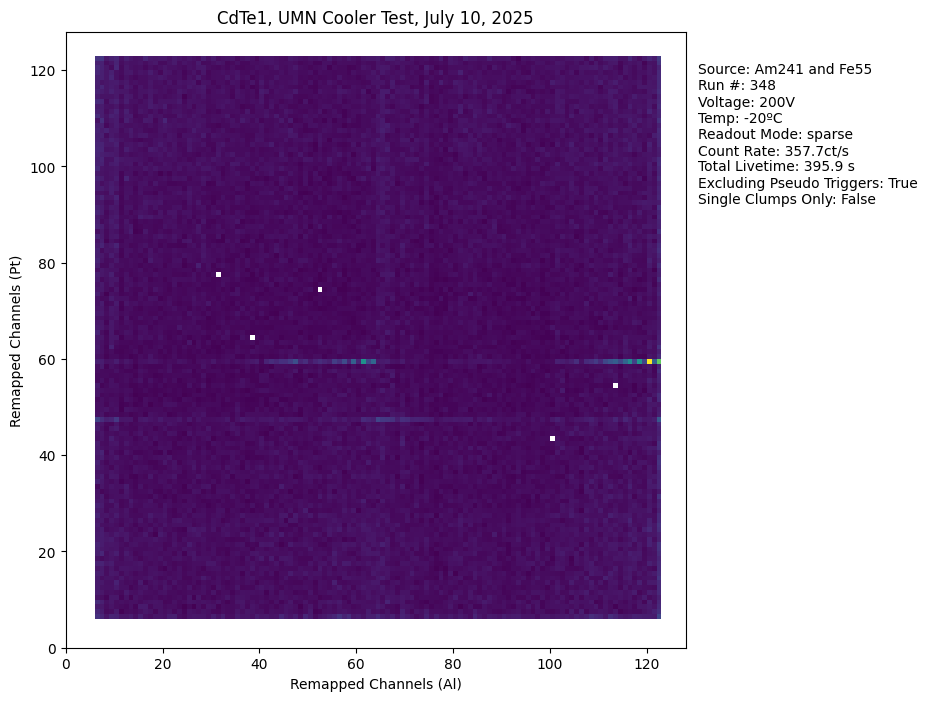

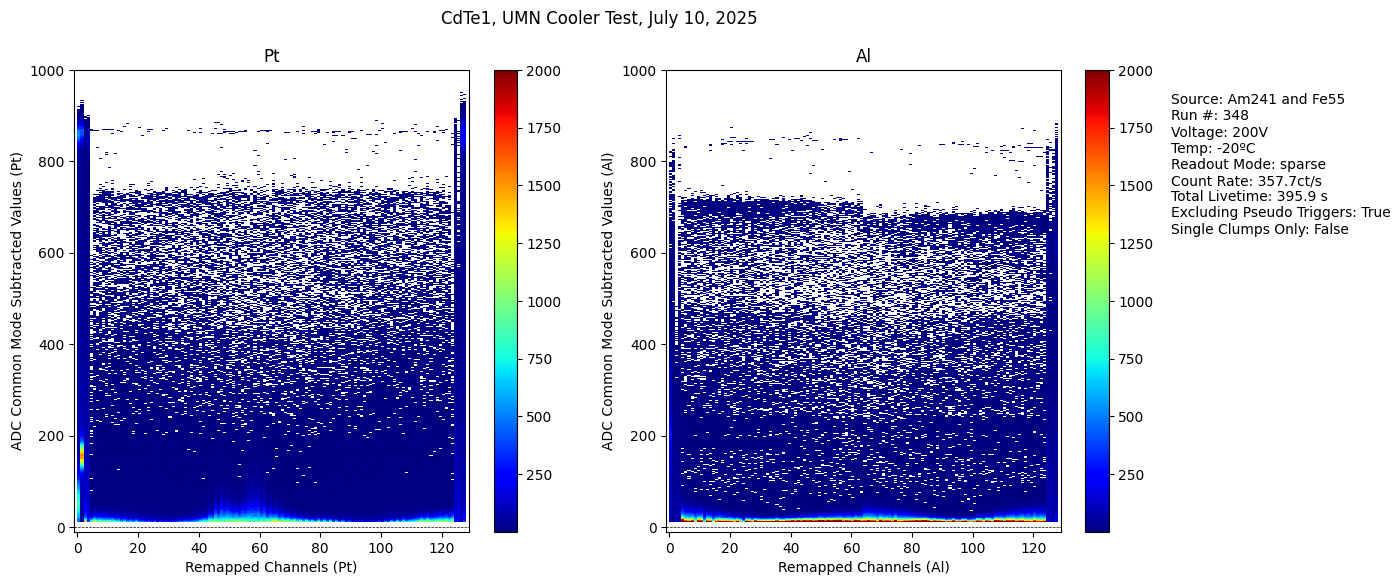

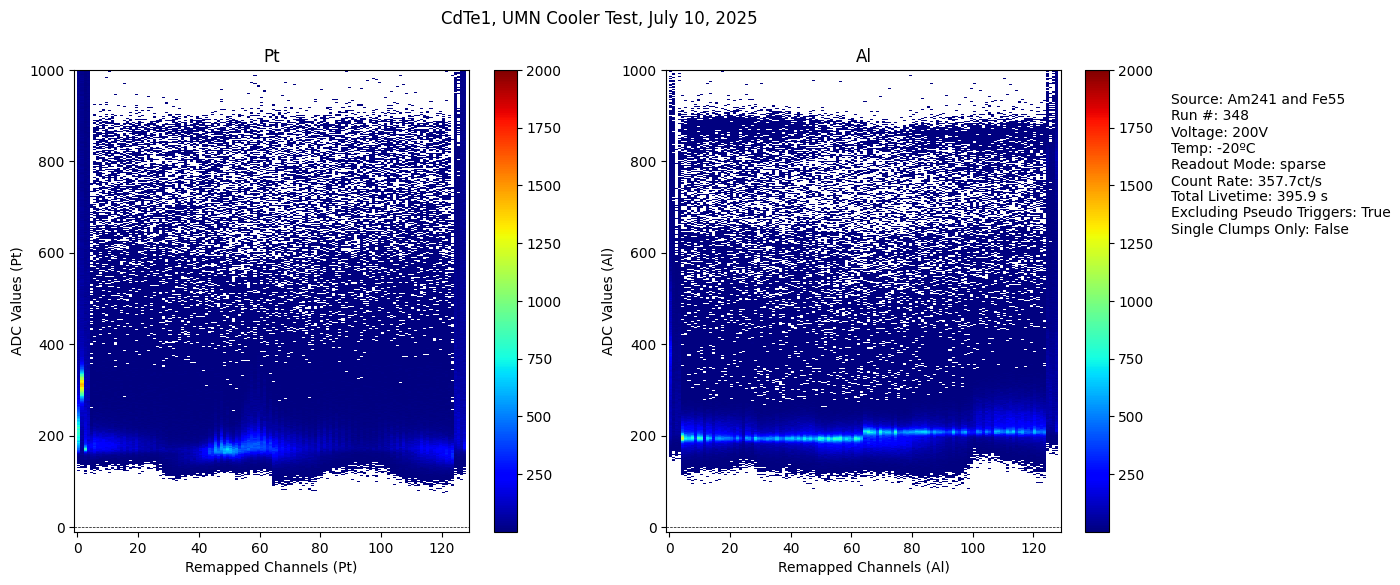

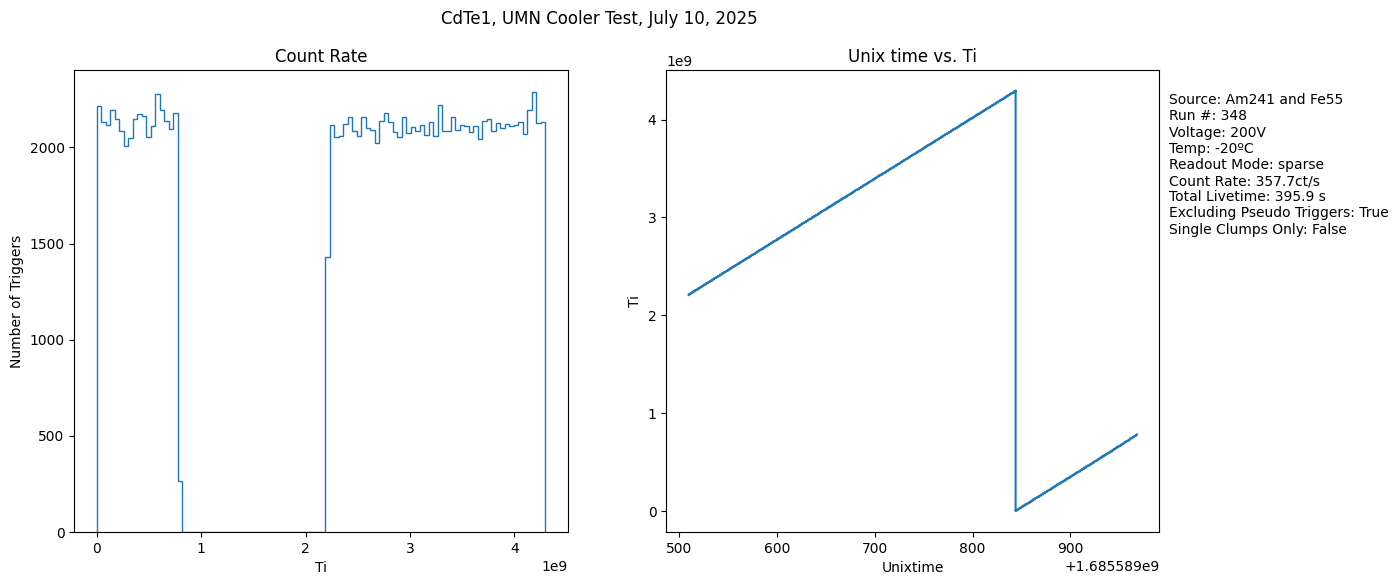

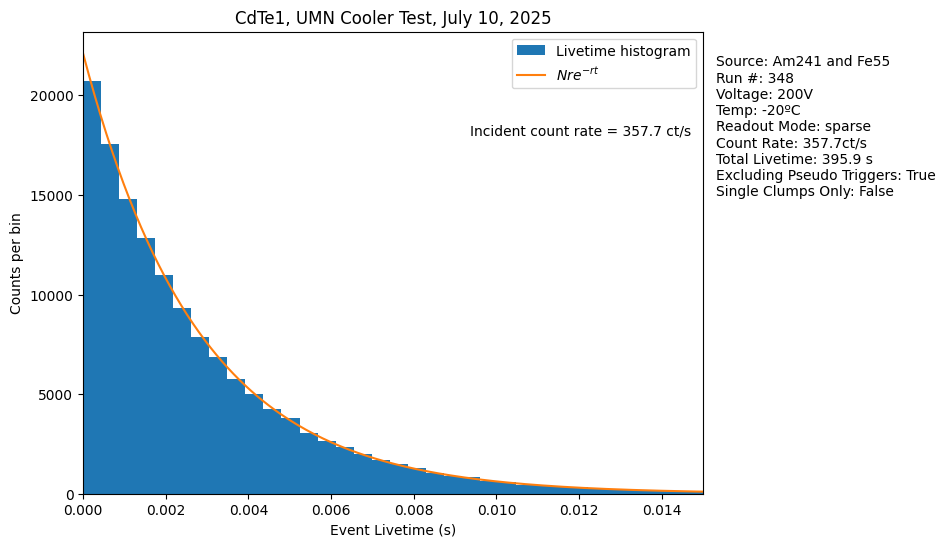

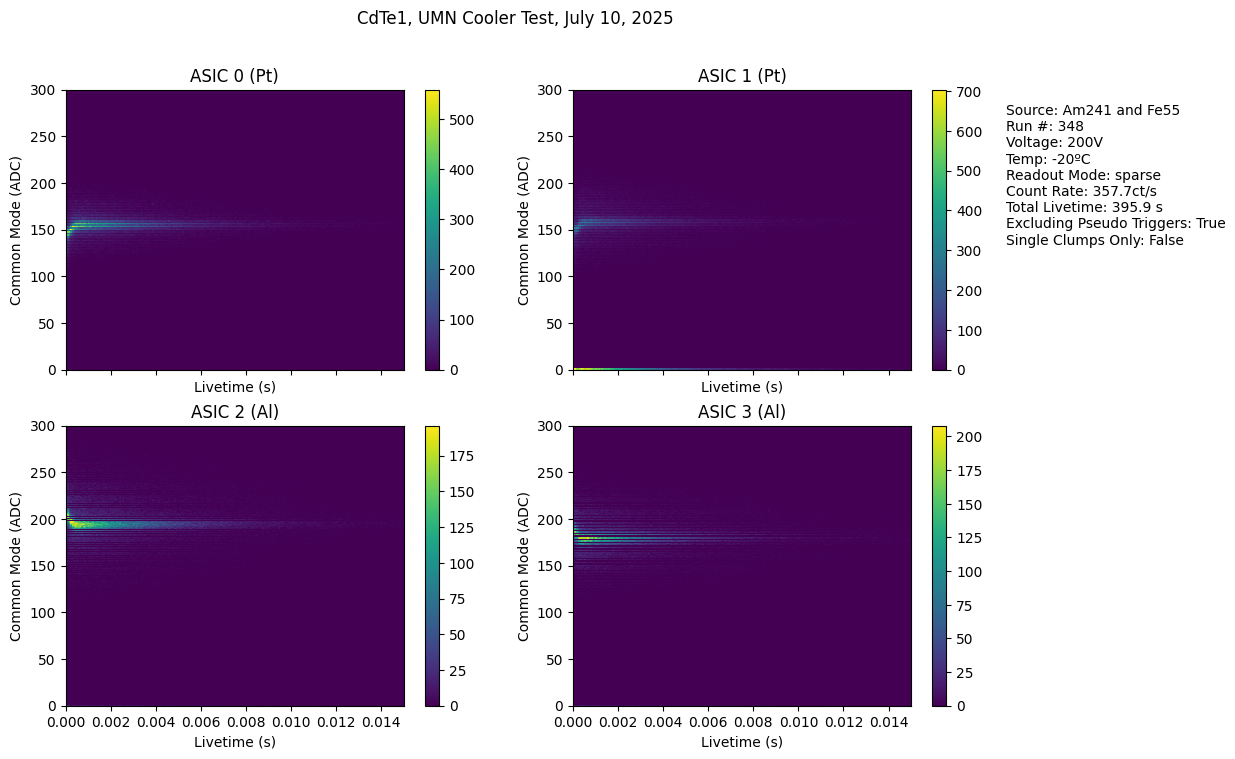

In [12]:
from utils import run_lab_plotting as rlp
import importlib
importlib.reload(rlp)

rlp.make_path1_plots(cdte_data, SUMMARY_DICT, PATH1_plotconfigs)

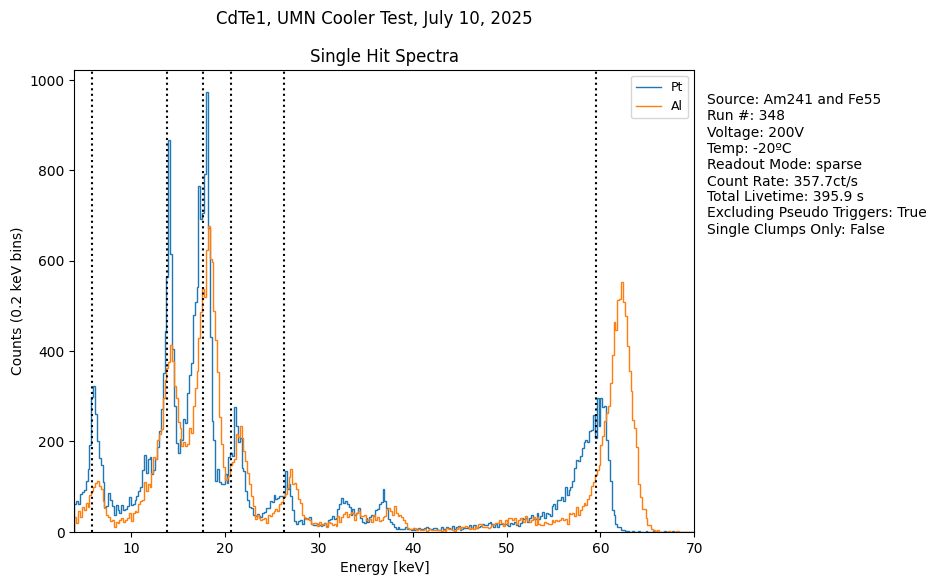

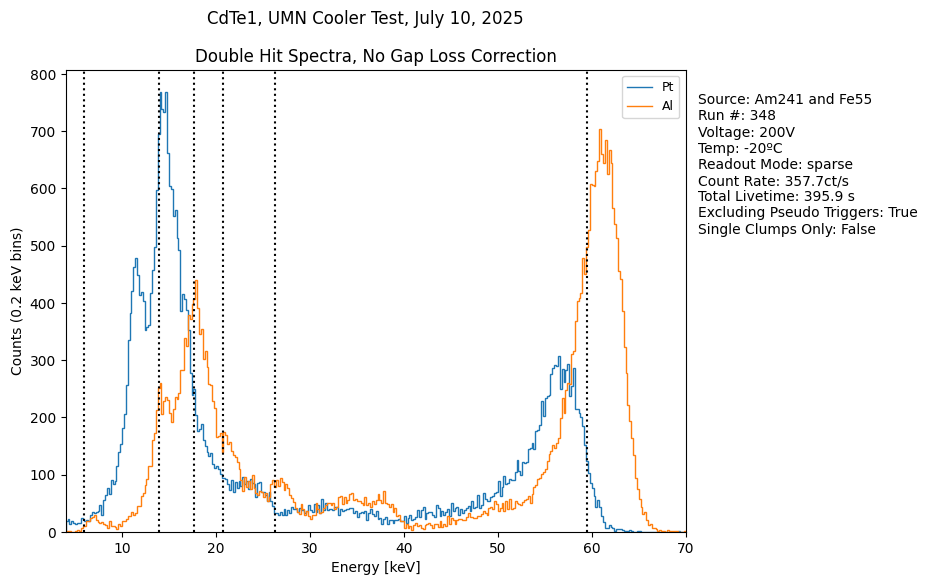

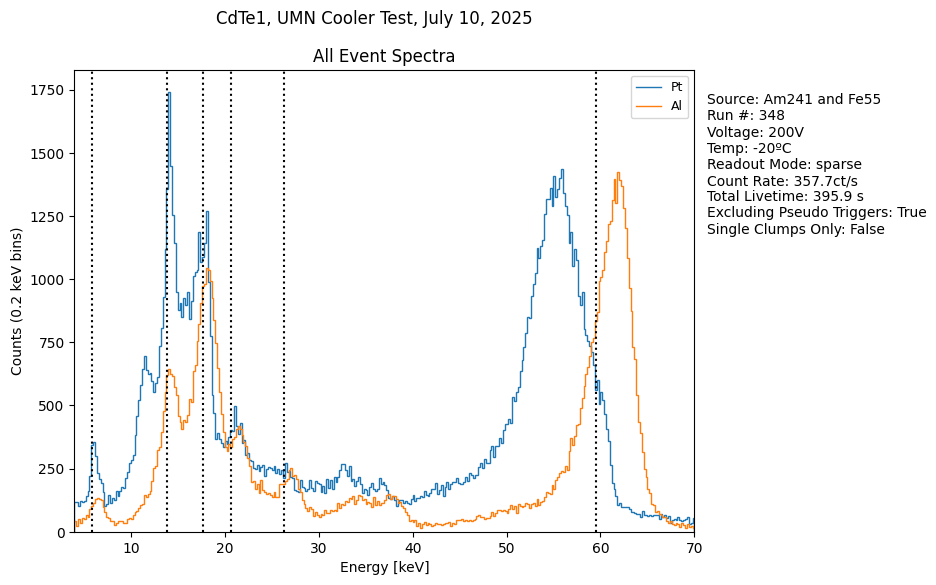

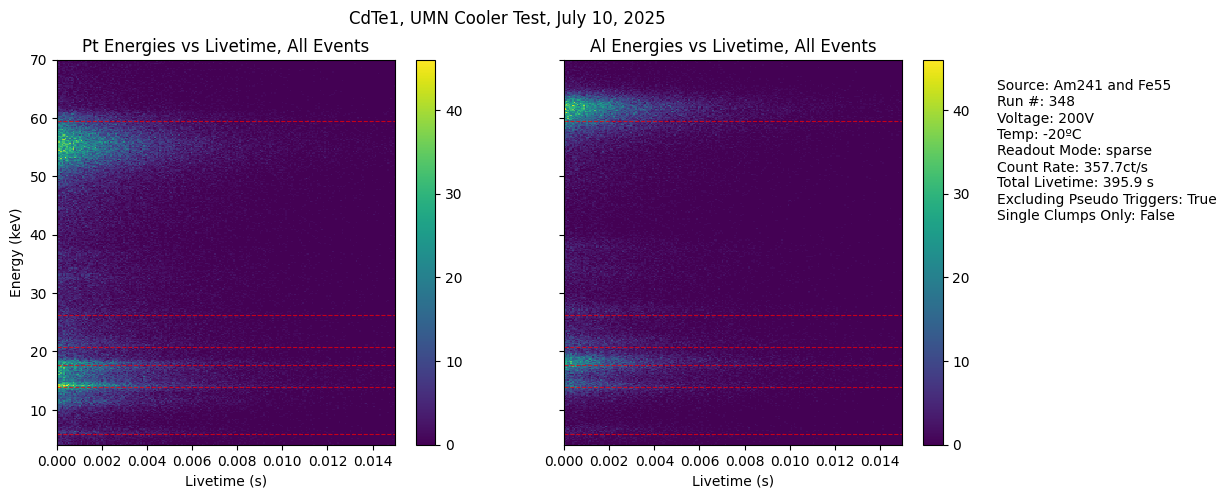

In [76]:
rlp.make_path2_plots(cdte_data, SUMMARY_DICT, PATH2_plotconfigs)

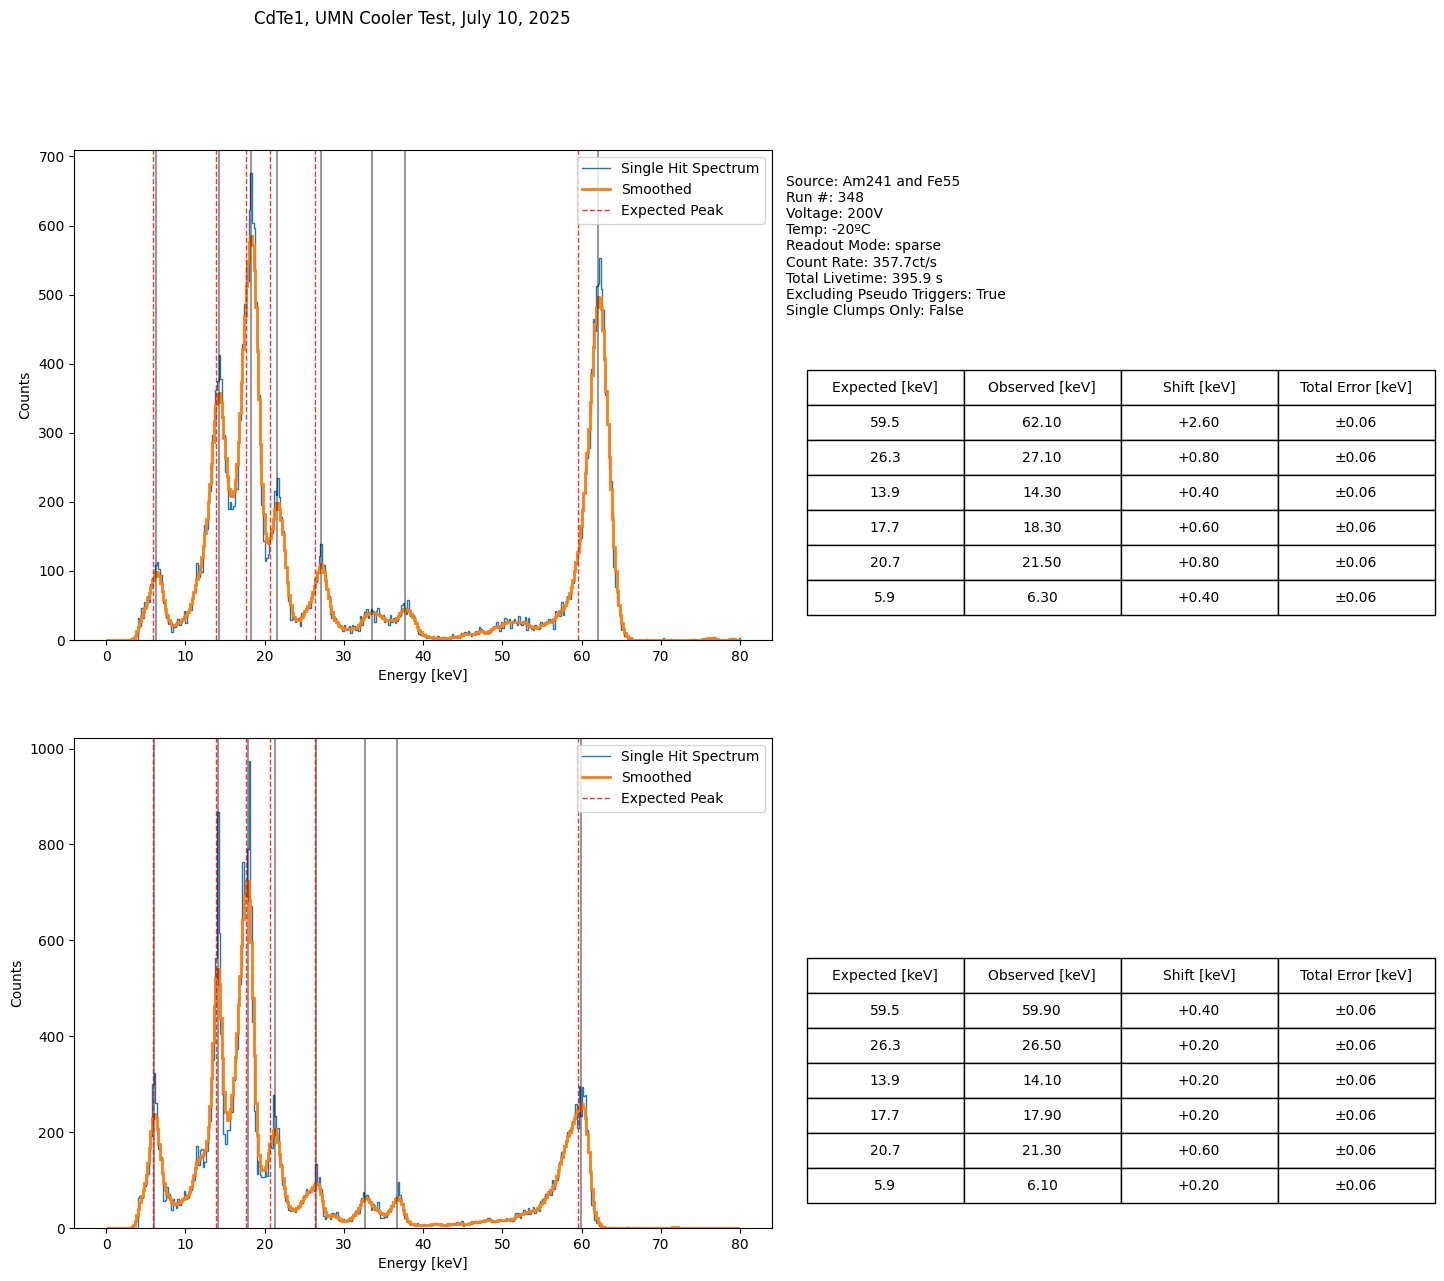

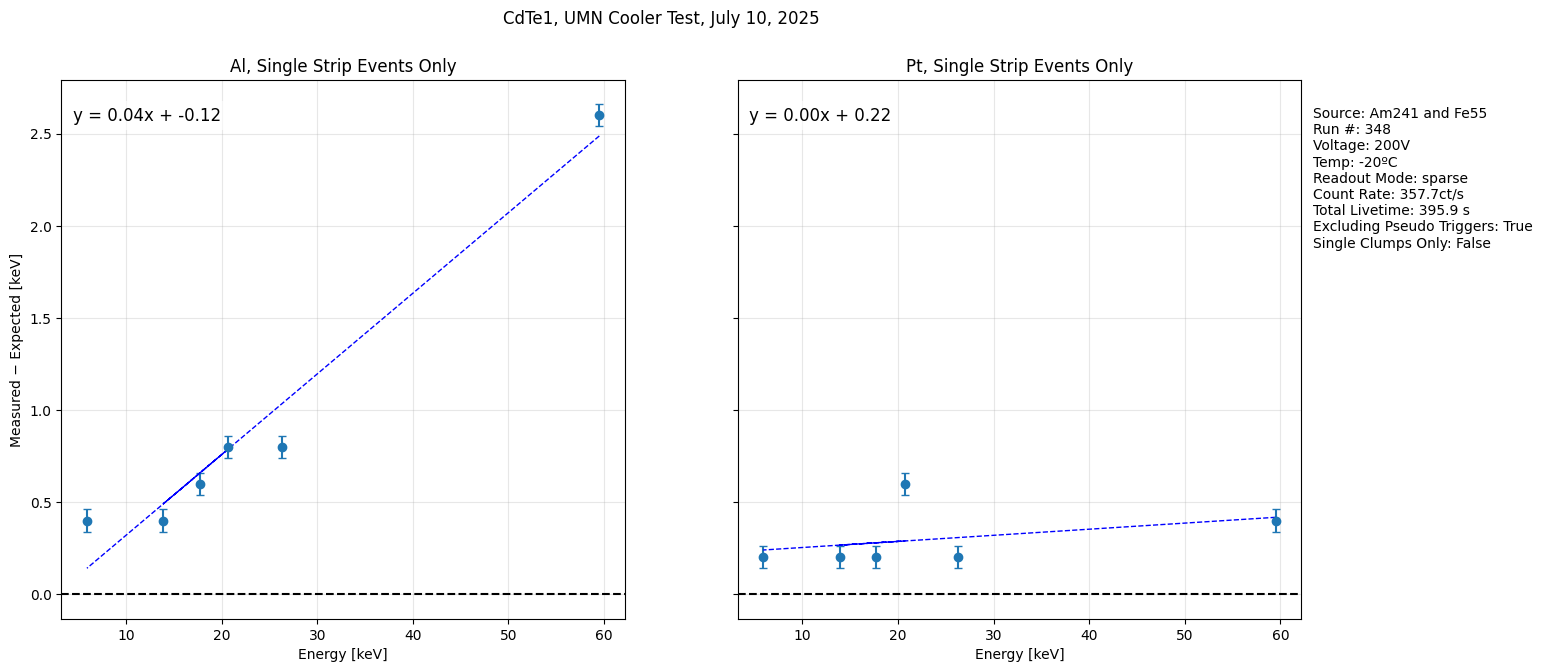

In [77]:
rlp.make_gainshit_plots(cdte_data, SUMMARY_DICT, GAIN_plotconfigs)

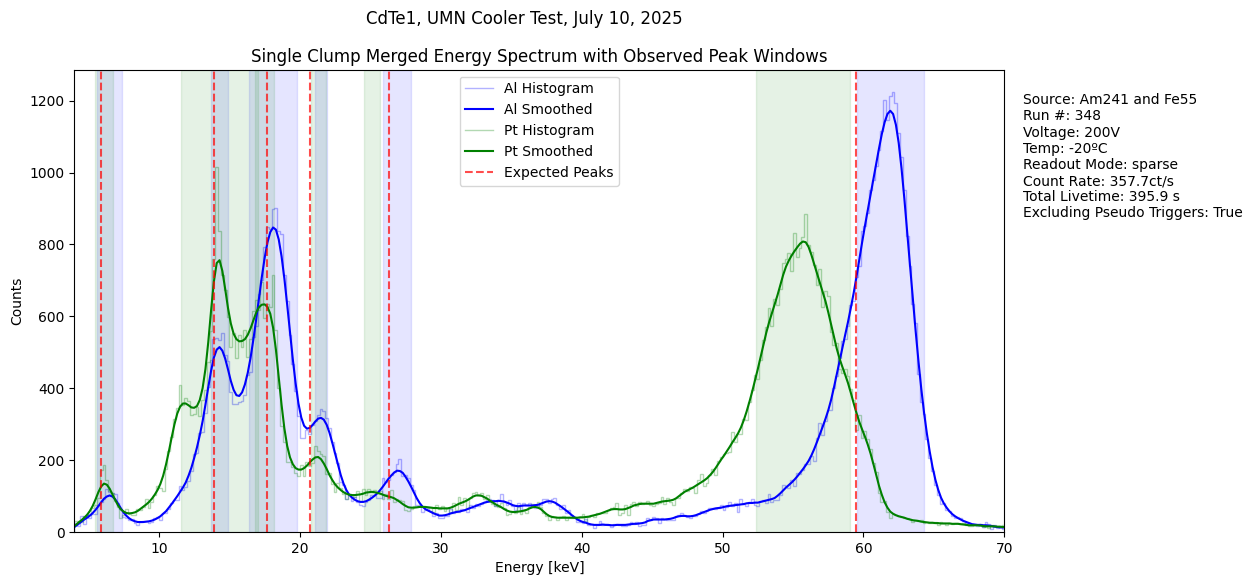

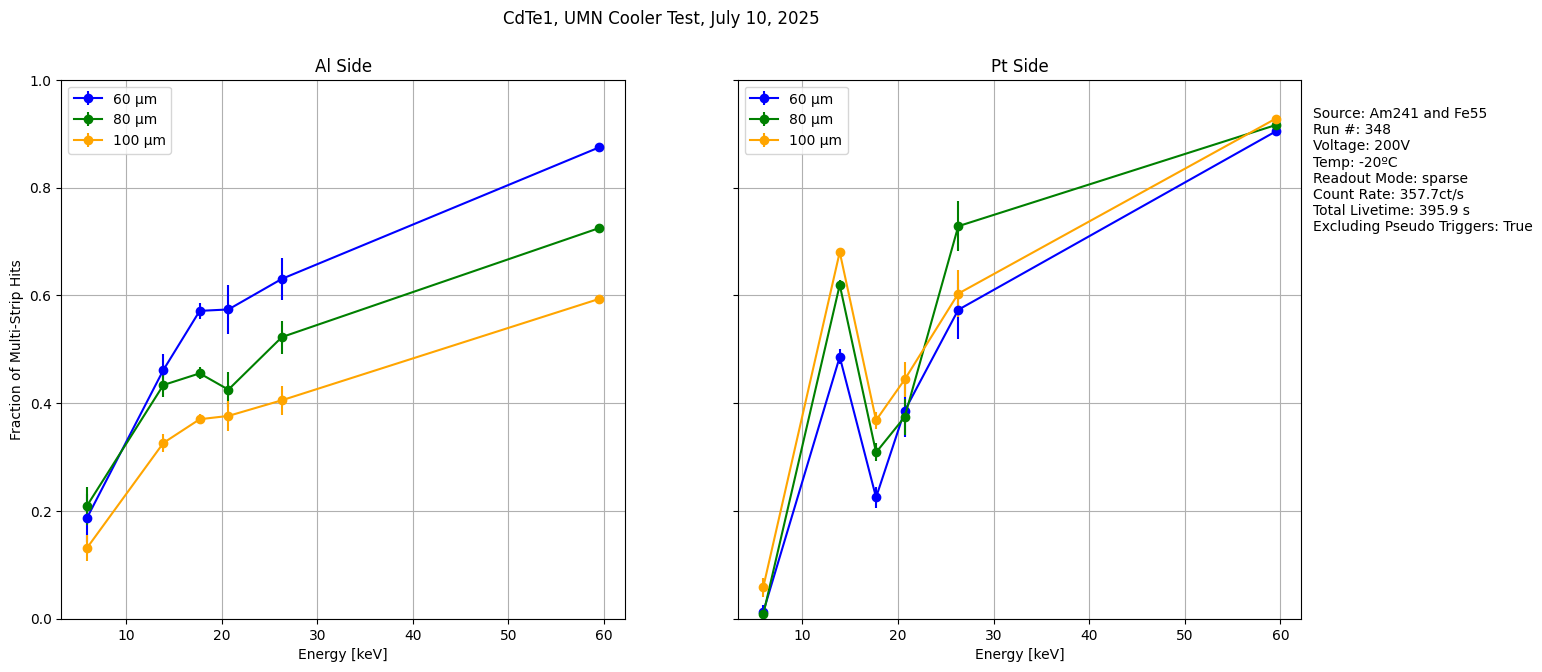

In [78]:
rlp.make_chargesharing_plots(cdte_data, SUMMARY_DICT, CHARGE_plotconfigs)

In [79]:
import os
savename = os.path.join(SUMMARY_DICT["SaveName"], f'run{SUMMARY_DICT["RunNumber"]}')
os.makedirs(savename, exist_ok=True)
filename = f'{savename}_summary.txt'
rlp.write_cdte_run_txt(filename, full_dict)

Run report written to updated2026plotting/UMNCoolingTests/July102025/CdTe1Am241Fe55/CdTe1/run348_summary.txt
